# Principal component analysis

The intention of this notebook is to perform the PCA analysis on genotype data and generate plots. However, a bug leads to improper PCA plot. Here we try to find why and fix it. 

### Problem - improper PCA plot

> /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/030821_ukb42495_exomed_white_189010ind.pheno.white_expanded_06_14_21.extended_white.pca.pc.png (268.5 KiB):

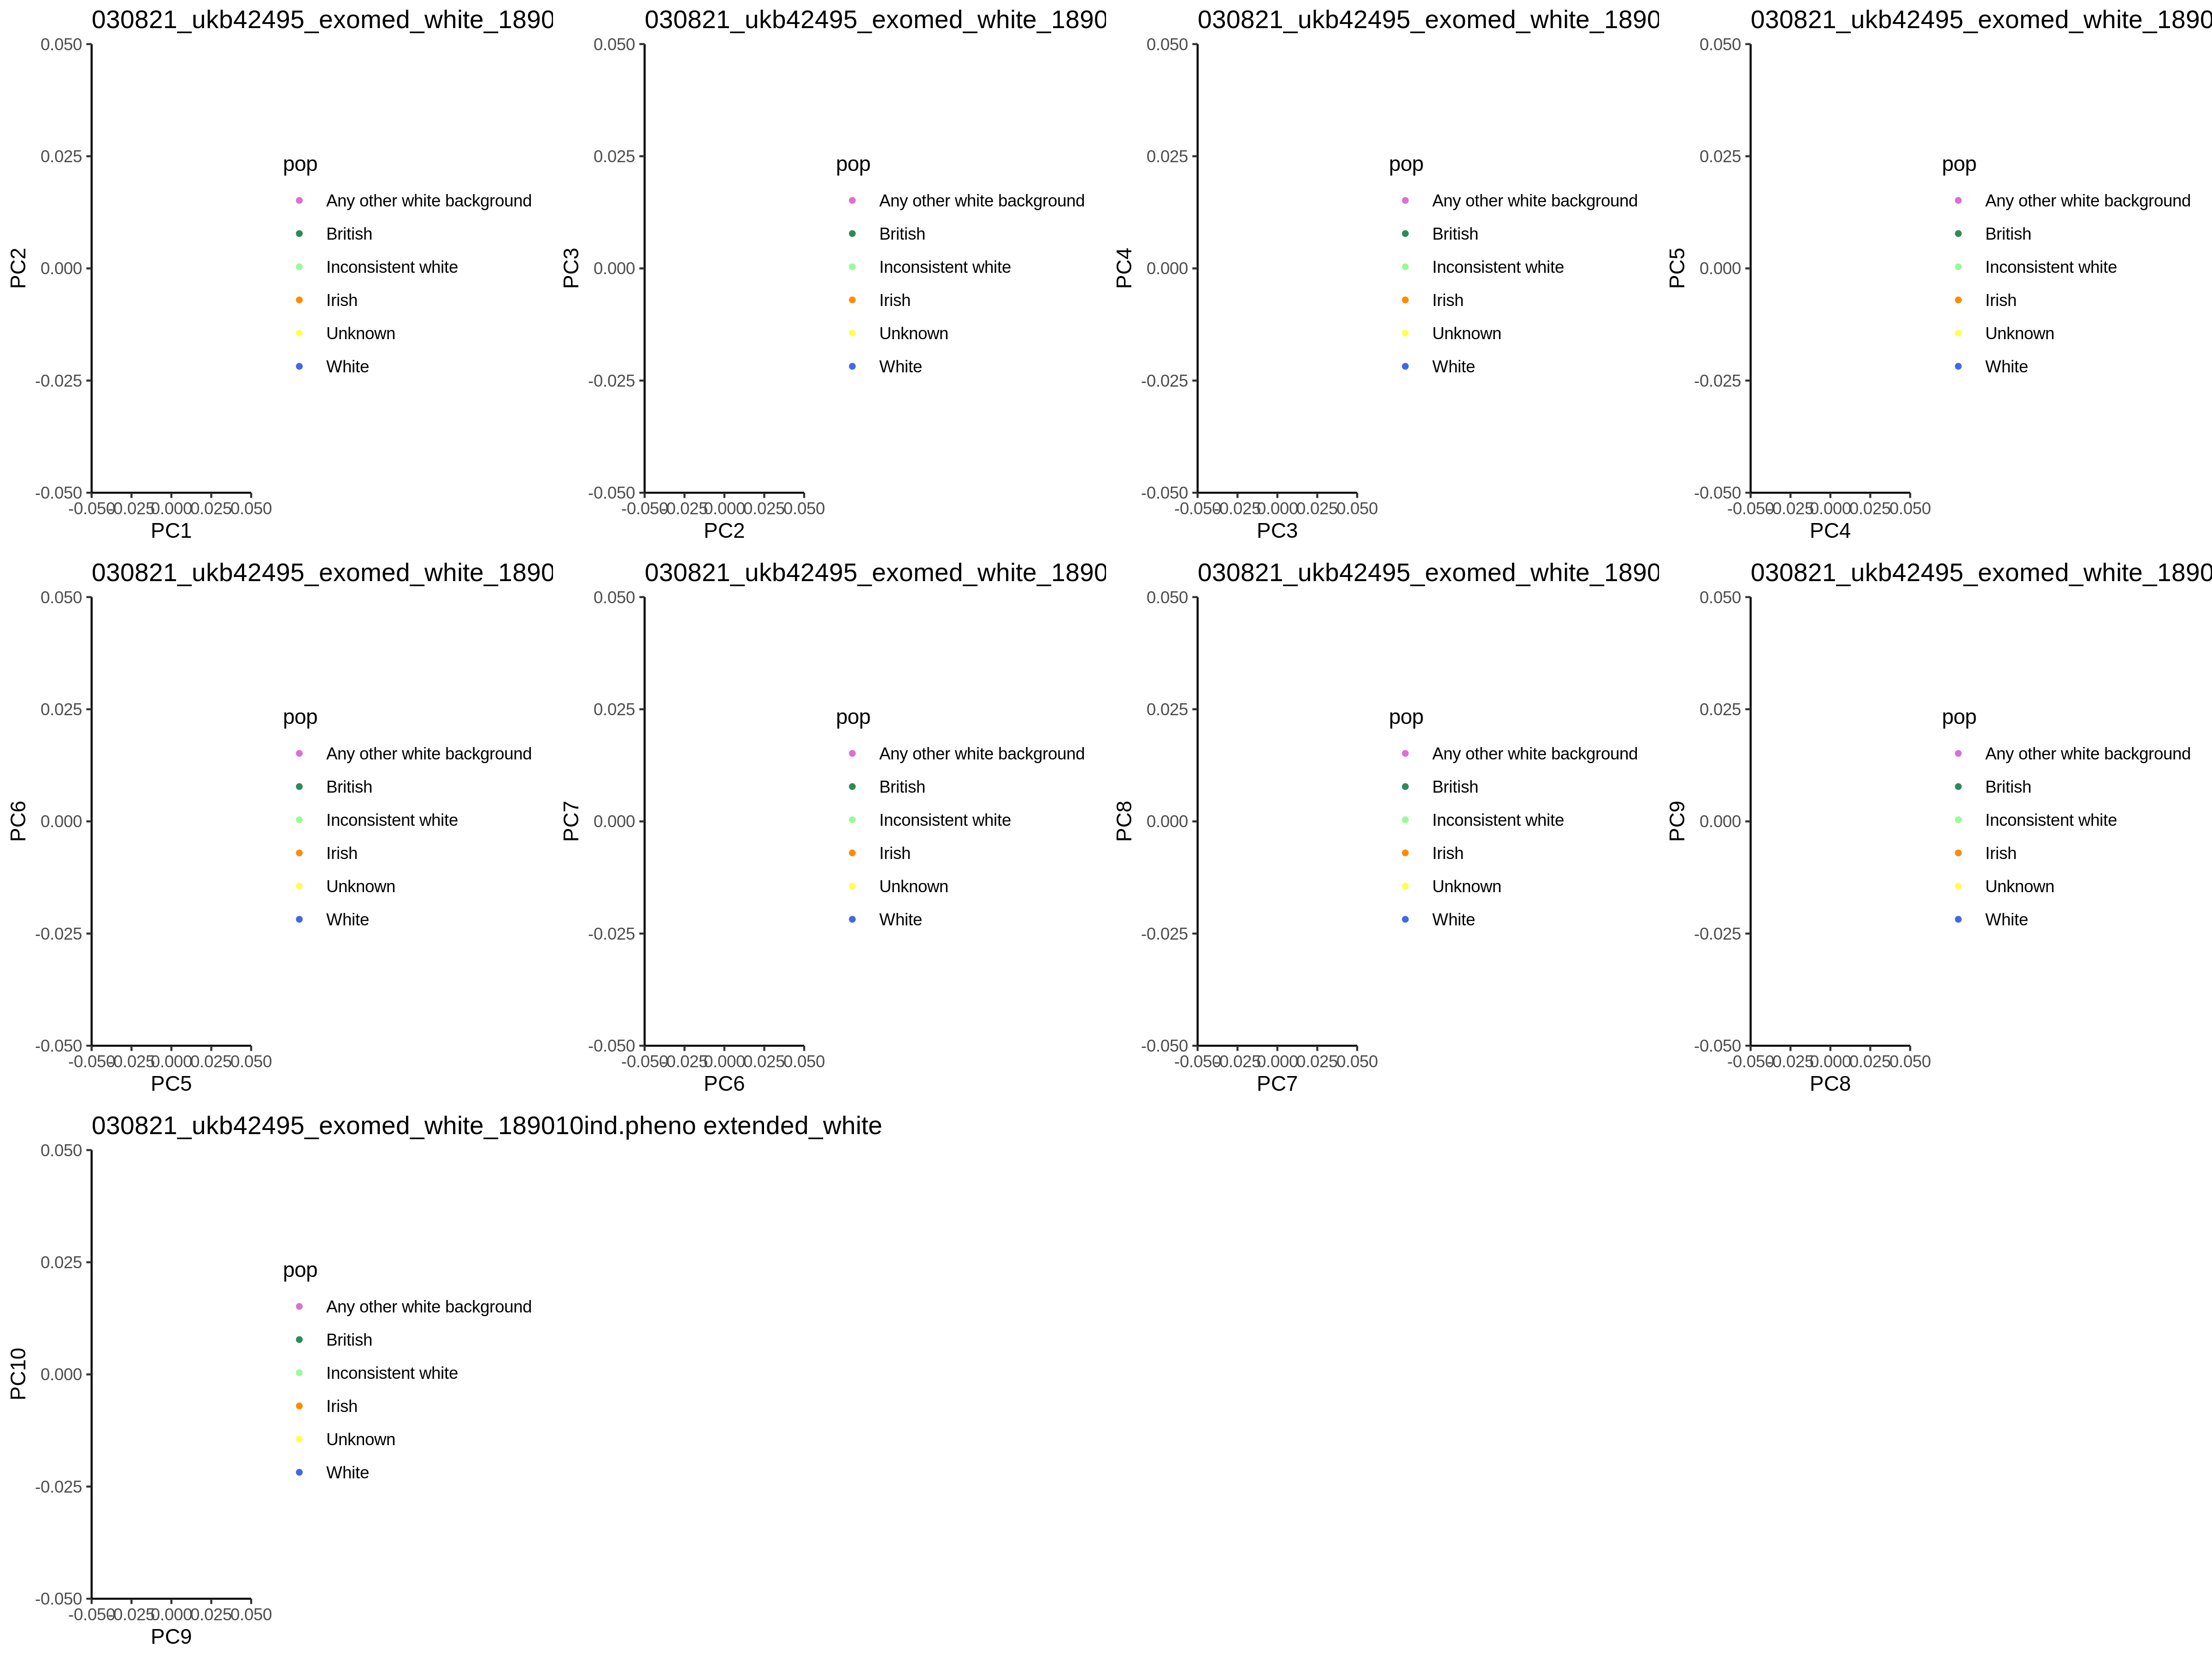

In [5]:
%preview  ~/bioworkflows/GWAS/data/white_expanded_06_14_21/030821_ukb42495_exomed_white_189010ind.pheno.white_expanded_06_14_21.extended_white.pca.pc.png

> /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/030821_ukb42495_exomed_white_189010ind.pheno.white_expanded_06_14_21.extended_white.pca.scree.png (50.4 KiB):

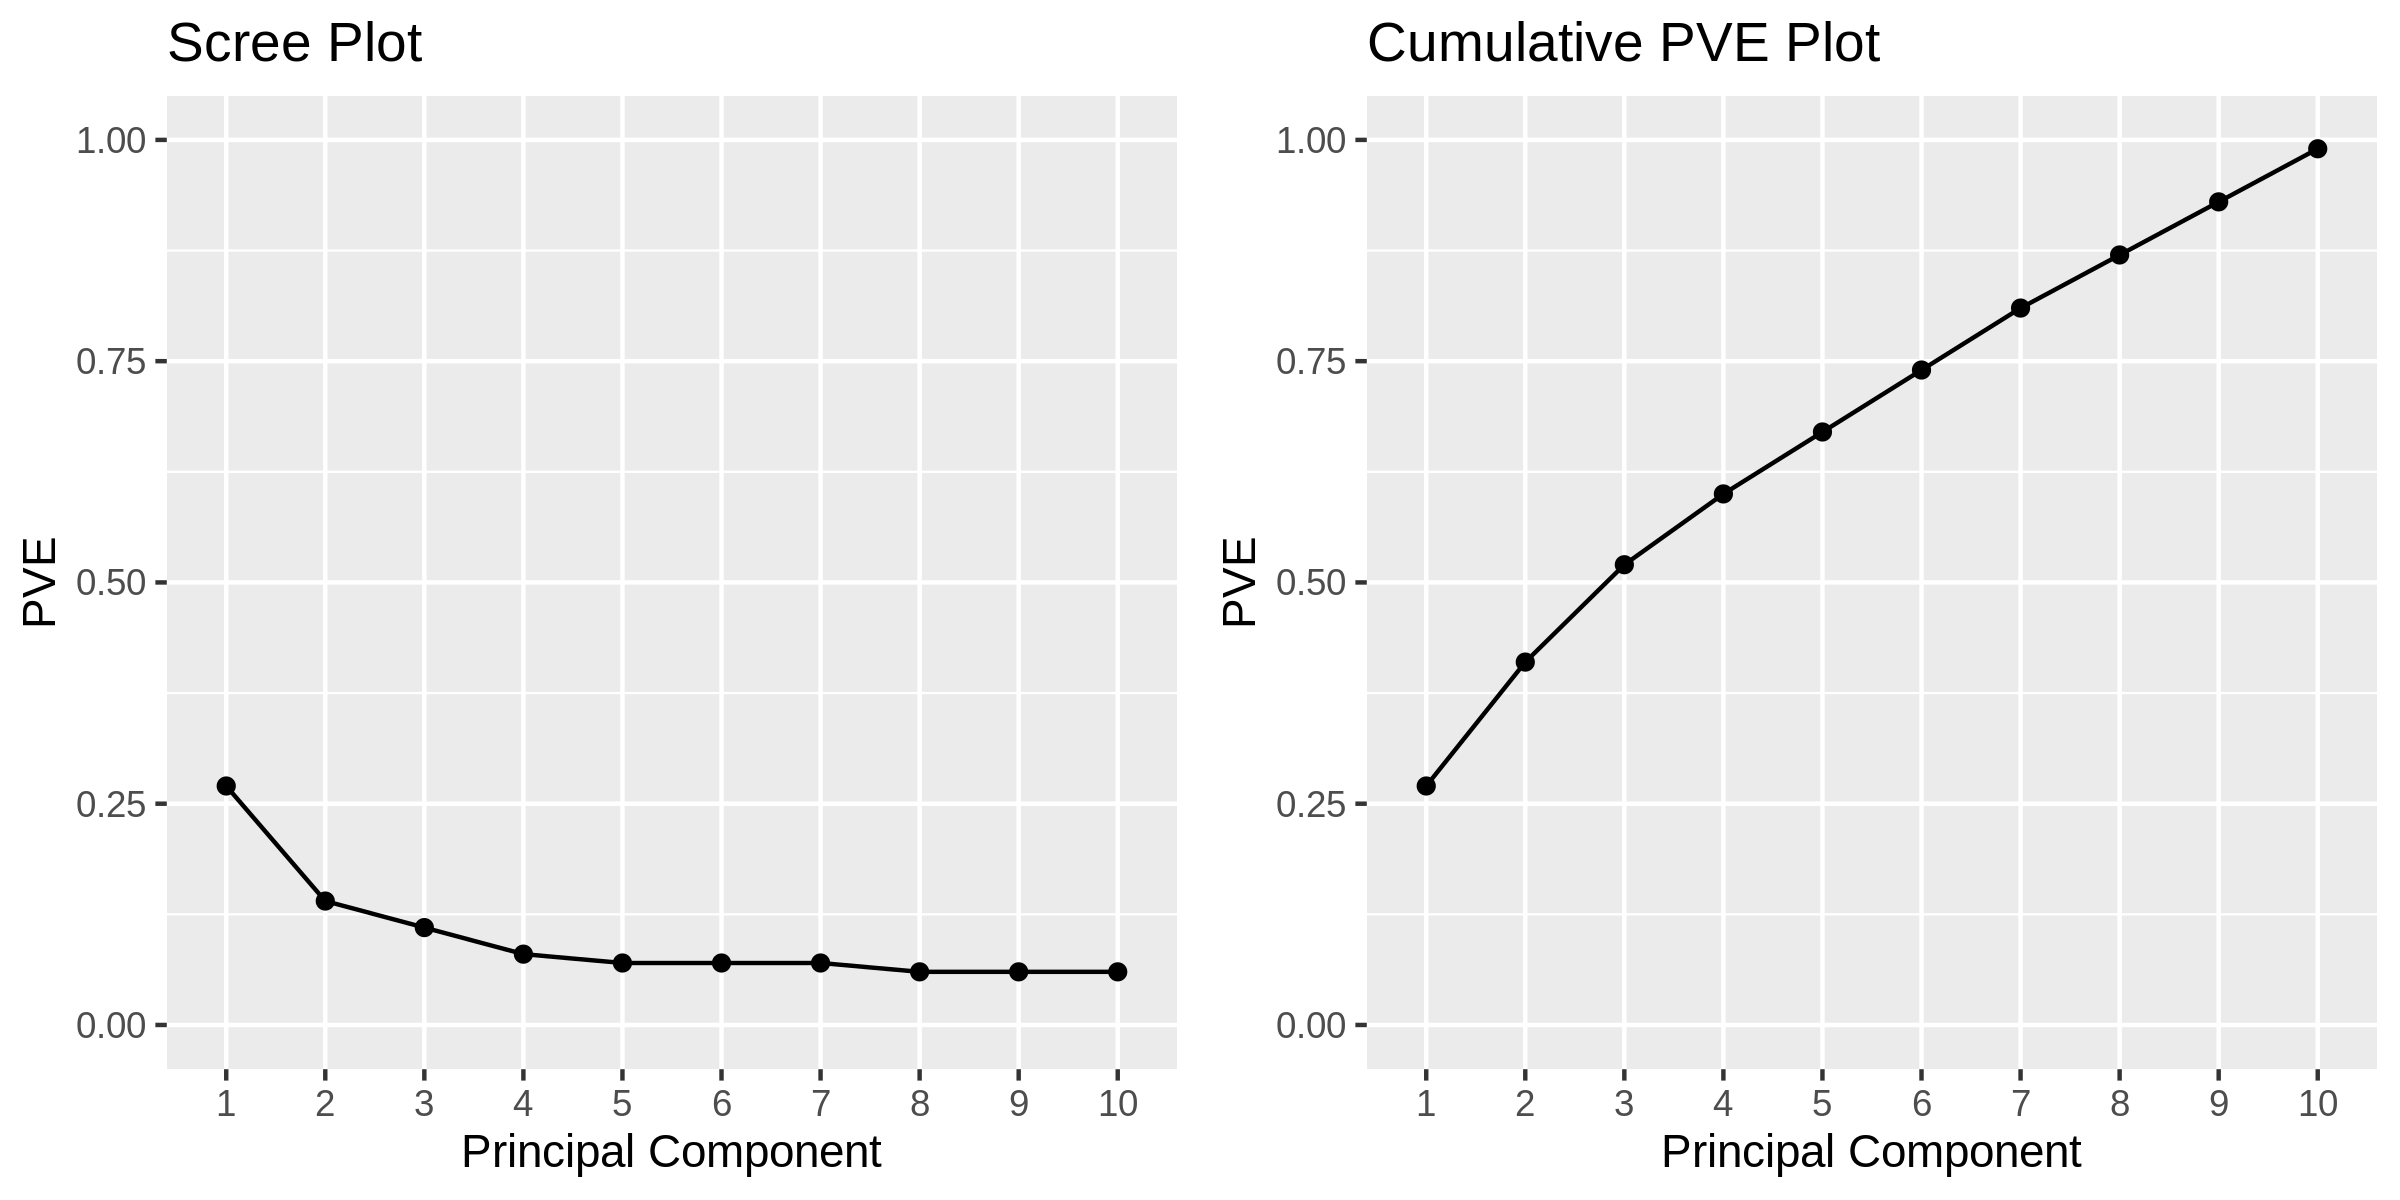

>>> ~/bioworkflows/GWAS/data/white_expanded_06_14_21/030821_ukb42495_exomed_white_189010ind.pheno.white_expanded_06_14_21.extended_white.pca.scree.png:

bash: /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/030821_ukb42495_exomed_white_189010ind.pheno.white_expanded_06_14_21.extended_white.pca.scree.png: Permission denied



In [6]:
%preview ~/bioworkflows/GWAS/data/white_expanded_06_14_21/030821_ukb42495_exomed_white_189010ind.pheno.white_expanded_06_14_21.extended_white.pca.scree.png

The scree plot looks fine but not pc plot. There're warning massages found in .stdout file.

Warning messages:
1: Removed 168364 rows containing missing values (geom_point). 
2: Removed 168364 rows containing missing values (geom_point). 
3: Removed 168364 rows containing missing values (geom_point). 
4: Removed 168364 rows containing missing values (geom_point). 
5: Removed 168364 rows containing missing values (geom_point). 
6: Removed 168364 rows containing missing values (geom_point). 
7: Removed 168364 rows containing missing values (geom_point). 
8: Removed 168364 rows containing missing values (geom_point). 
9: Removed 168364 rows containing missing values (geom_point). 

### Replicate the error

In [ ]:
# Step 1: Estimate kinship in the sample
sos run GWAS_QC.ipynb king \
  --cwd ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output \
  --container_lmm  "statisticalgenetics/lmm:1.9" \
  --genoFile ~/bioworkflows/GWAS/data/white_expanded_06_14_21/ukb23155_unrelated_pruned_merged.bed \
  --kinship 0.13

In [ ]:
# Step 2: Sample selection and QC the genetic data for unrelated individuals
sos run GWAS_QC.ipynb qc \
  --container_lmm "statisticalgenetics/lmm:1.9" \
  --genoFile ~/bioworkflows/GWAS/data/white_expanded_06_14_21/rename_chr22.bed \
  --remove_samples ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/rename_chr22.output.related_id \
  --maf_filter 0.5 \
  --geno_filter 0.2 \
  --mind_filter 0.1 \
  --hwe_filter 0.0 \
  --name unrelated \
  --cwd ~/bioworkflows/GWAS/data/MWE_AD/output \
  --window 50 \
  --shift 10 \
  --r2 0.5 

In [ ]:
# Step 3: Get related individuals using the same variants we have come up with previously
sos run GWAS_QC.ipynb qc:1 \
  --container_lmm "statisticalgenetics/lmm:1.9" \
  --genoFile ~/bioworkflows/GWAS/data/MWE_AD/rename_chr22.bed \
  --keep-samples ~/bioworkflows/GWAS/data/MWE_AD/output/rename_chr22.output.related_id\
  --keep-variants ~/bioworkflows/GWAS/data/MWE_AD/output/cache/rename_chr22.unrelated.filtered.prune.in\
  --maf-filter 0 --geno-filter 0 --mind-filter 0.1 --hwe-filter 0\
  --name related \
  --cwd ~/bioworkflows/GWAS/data/MWE_AD/output/

In [2]:
# Step 4: PCA analysis for all samples
sos run PCA.ipynb flashpca\
    --cwd ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output\
    --genoFile ~/bioworkflows/GWAS/data/white_expanded_06_14_21/ukb23155_unrelated_pruned_merged.bed\
    --phenoFile ~/bioworkflows/GWAS/data/white_expanded_06_14_21/030821_ukb42495_exomed_white_189010ind.pheno.new\
    --k 10\
    --maha_k 5\
    --label_col pop\
    --pop_col pop\
    --pops extended_white\
    --min_axis 0\
    --max_axis 0\
    --numThreads 1 \
    --job_size 1\
    --container_lmm "statisticalgenetics/lmm:1.9" \
    -s build &> ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/2021-06-24_flashpca_white_unrelated.log

> /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png (268.5 KiB):

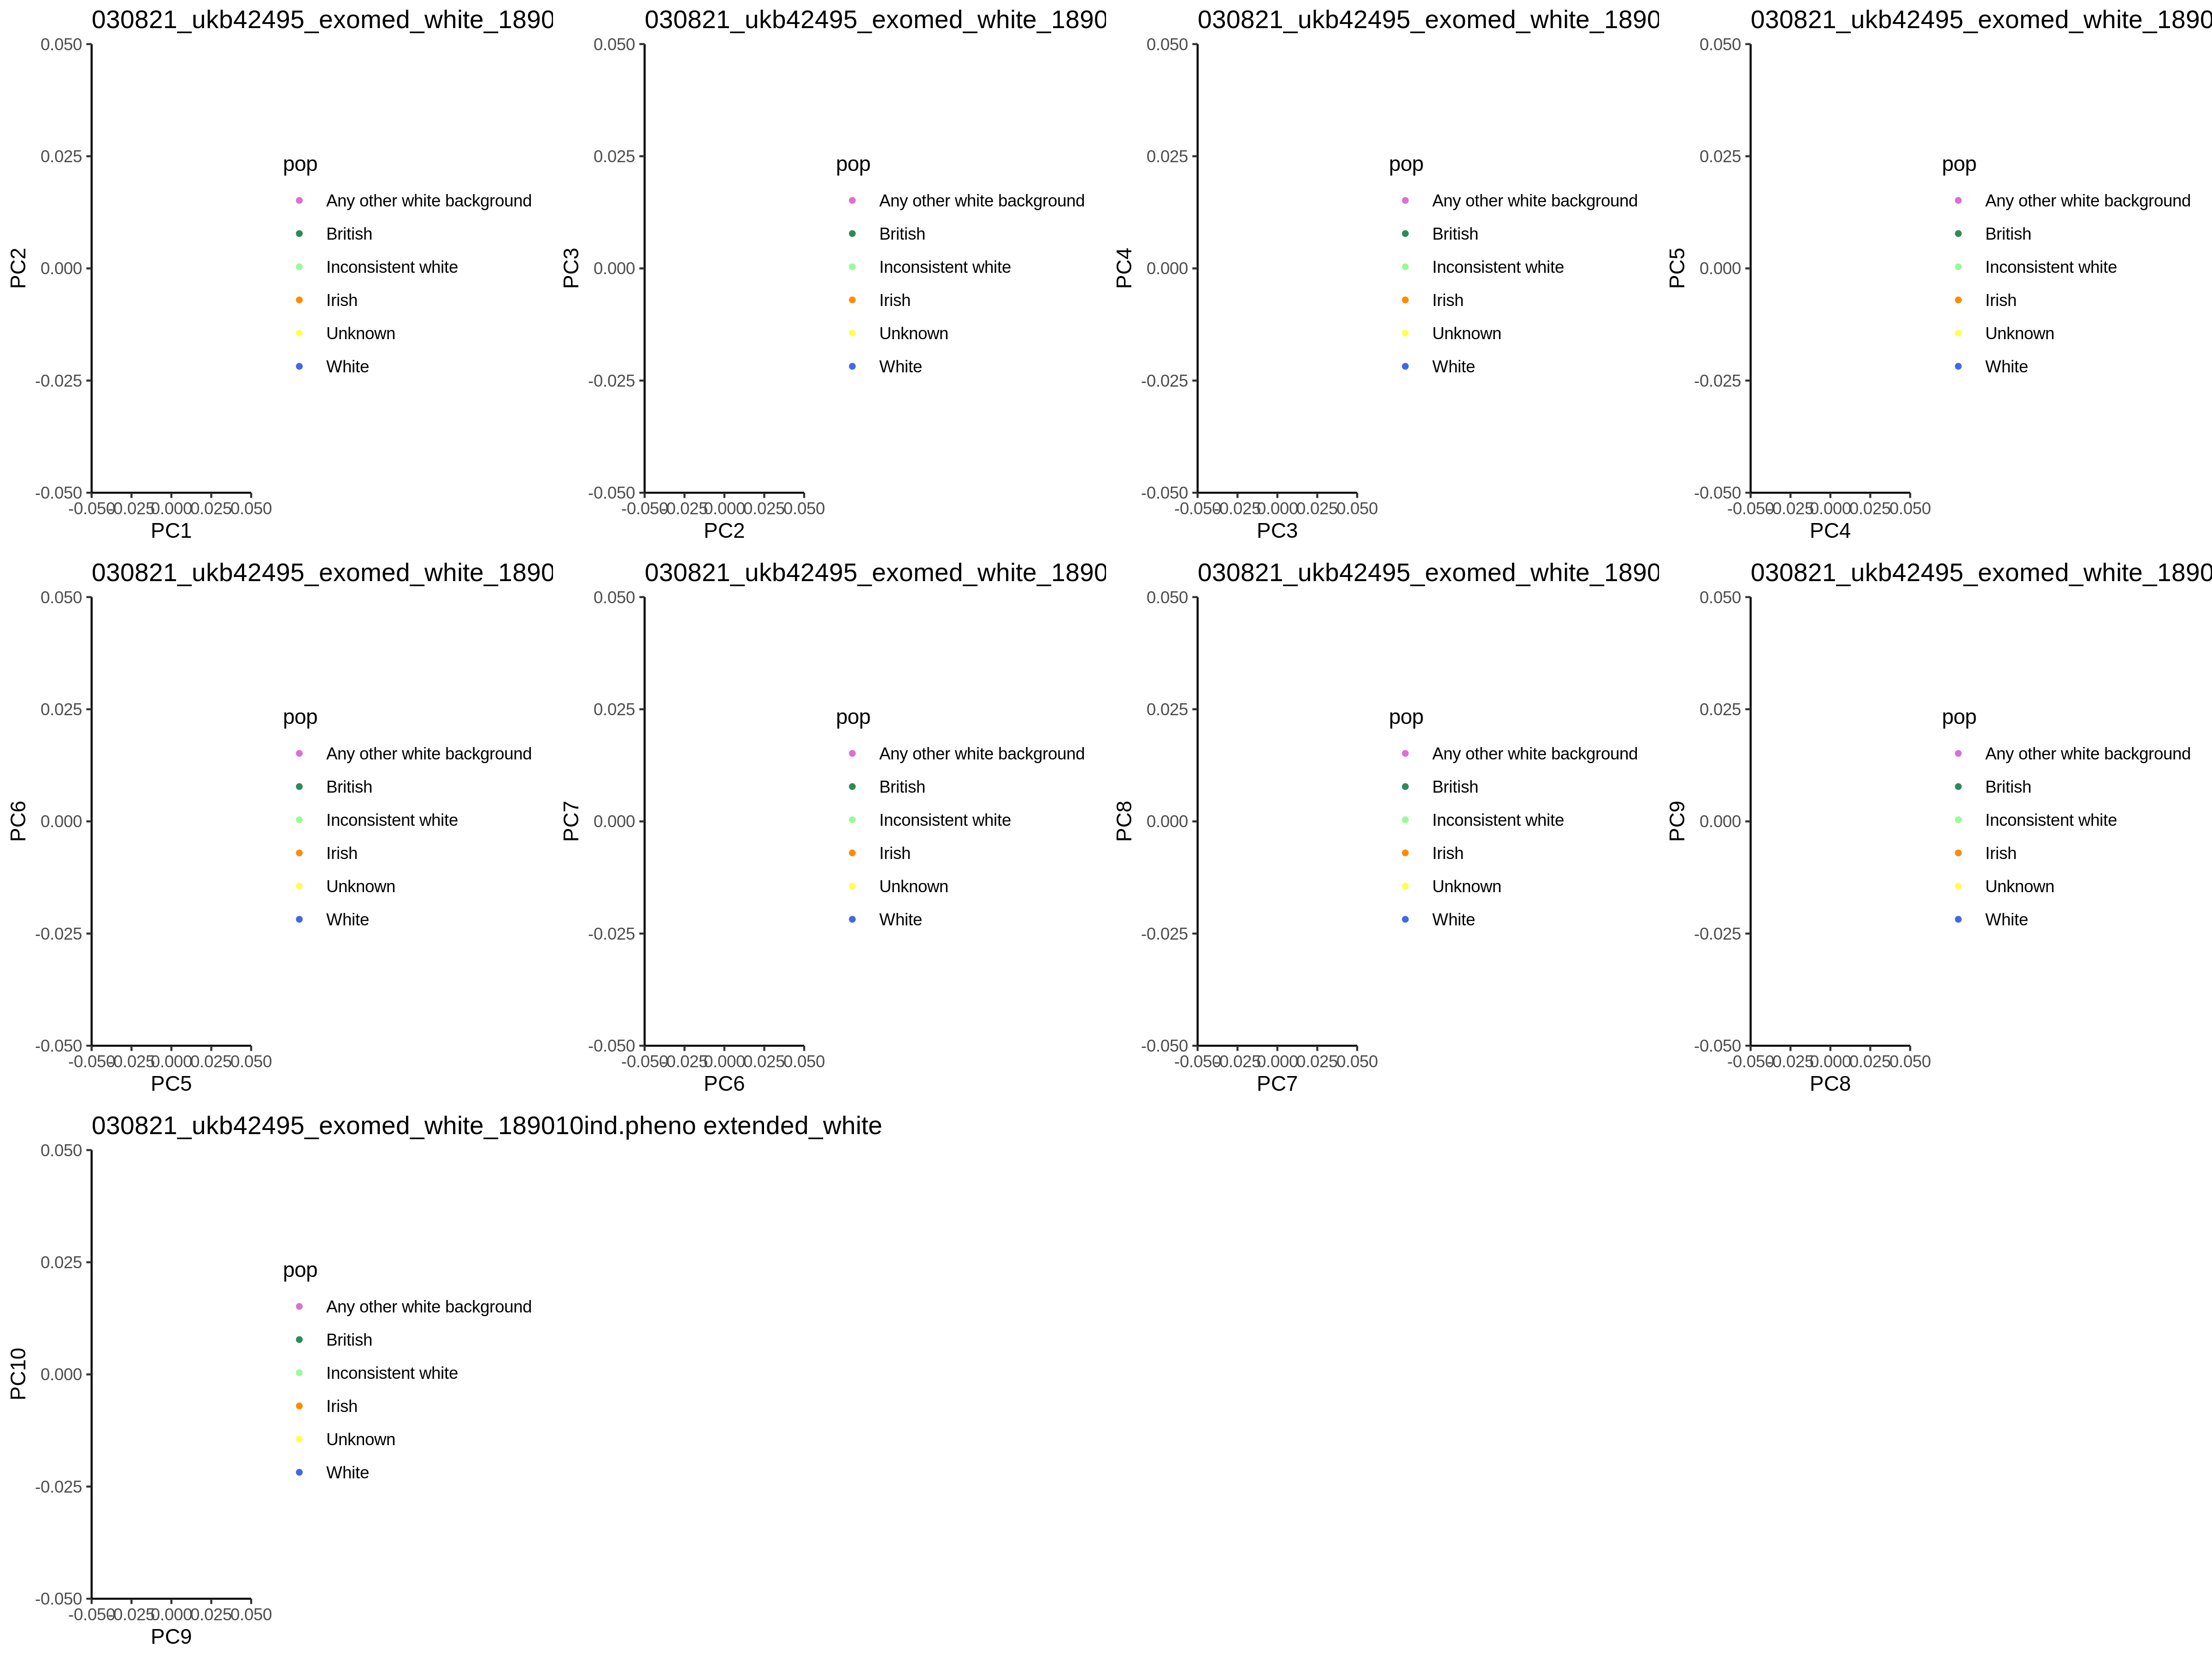

>>> ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png:

bash: /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png: Permission denied



In [7]:
%preview ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png

> /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.scree.png (50.4 KiB):

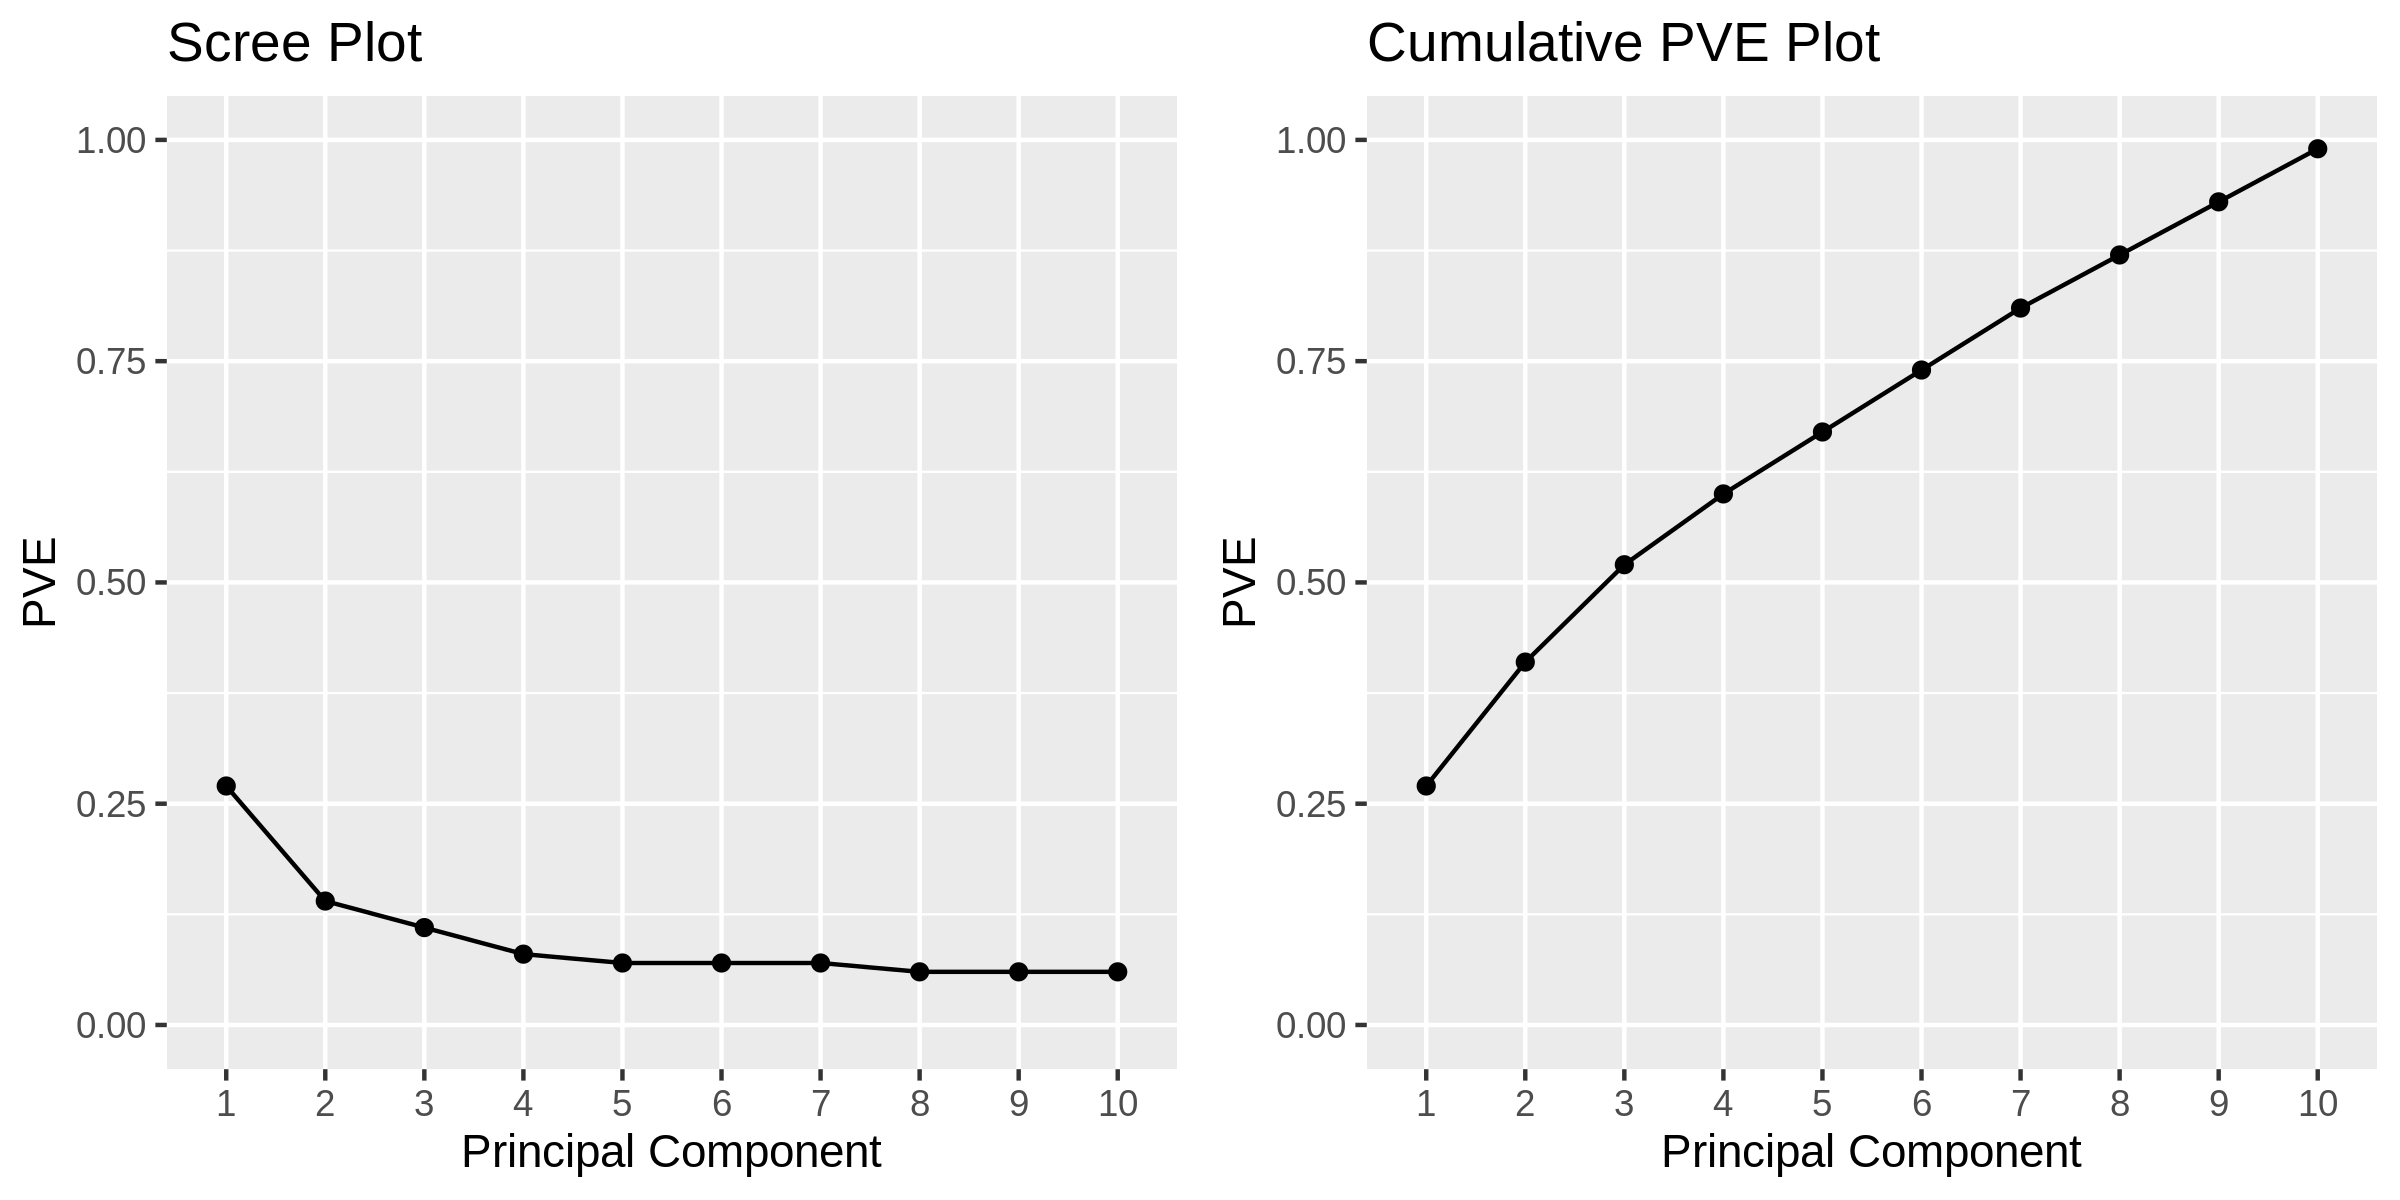

>>> ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.scree.png:

bash: /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.scree.png: Permission denied



In [8]:
%preview ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.scree.png

The error can be replicated. The same warning massages can be found. Nothing particular is in the log file. The primary target is in step 4 where the plot is generated.

### Derive the code by dryrun

In [11]:
# Step 4: PCA analysis for all samples
sos dryrun PCA.ipynb flashpca\
    --cwd ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output\
    --genoFile ~/bioworkflows/GWAS/data/white_expanded_06_14_21/ukb23155_unrelated_pruned_merged.bed\
    --phenoFile ~/bioworkflows/GWAS/data/white_expanded_06_14_21/030821_ukb42495_exomed_white_189010ind.pheno.new\
    --k 10\
    --maha_k 5\
    --label_col pop\
    --pop_col pop\
    --pops extended_white\
    --min_axis 0\
    --max_axis 0\
    --numThreads 1 \
    --job_size 1\
    --container_lmm "statisticalgenetics/lmm:1.9"

INFO: Checking flashpca_1: Run PCA analysis using flashpca
HINT: Pulling docker image statisticalgenetics/lmm:1.9
HINT: Docker image statisticalgenetics/lmm:1.9 is now up to date
HINT: docker run --rm --security-opt label:disable -v /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21:/home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21 -v /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/output:/home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/output -v /home/lg/bioworkflows/GWAS:/home/lg/bioworkflows/GWAS -v /home/lg/bioworkflows/GWAS/tmpgo_bajjp/docker_run_27808.R:/var/lib/sos/docker_run_27808.R    -t  -w=/home/lg/bioworkflows/GWAS -u 1000:1000    statisticalgenetics/lmm:1.9 Rscript /var/lib/sos/docker_run_27808.R
# Load required libraries
library(flashpcaR)
library(dplyr)
pops = c('extended_white')
f <- flashpca('/home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/ukb23155_unrelated_pruned_merged', ndim=10, stand="binom2", do_loadings=TRUE, check_geno=TRUE)
ro

### Check flashpca_2

In [23]:
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("matrixStats")
install.packages("dplyr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [24]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(matrixStats)
pops = c('extended_white')
dat = readRDS('~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.rds')
f = dat$pca_model
pca_final<-dat$pc_scores %>% filter(super_pop %in% pops| pop %in% pops) %>%
    mutate(pop=as.character(pop))
k = 10

In [28]:
head(pca_final)

,IID,FID,pop,super_pop,ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000019,1000019,British,extended_white,1000019:1000019,0.0056918007,0.0006512028,0.0016003623,-0.004338563,0.011634035,0.0044995988,-0.013559775,-0.003416719,0.001169705,-0.006322058
2,1000078,1000078,British,extended_white,1000078:1000078,-0.0003742905,0.0002672573,-0.0143882854,-0.011859195,-0.004067333,0.0051513679,-0.008217413,0.005326975,-0.002612823,0.004735674
3,1000081,1000081,British,extended_white,1000081:1000081,-0.1232350143,0.0428232157,0.0119473571,0.011400844,0.011158519,-0.0085836693,-0.002657686,-0.009613415,0.012170831,-0.002795681
4,1000198,1000198,British,extended_white,1000198:1000198,0.0067691798,-0.0054367441,0.0141044529,-0.007549446,0.006237112,0.0164642233,0.005429823,-0.007586691,-0.010708770,0.012263991
5,1000210,1000210,British,extended_white,1000210:1000210,0.0080509999,-0.0189110798,0.0009863376,-0.012054922,0.012861480,0.0007208524,0.006683462,-0.011096539,0.025421252,0.007849035
6,1000236,1000236,British,extended_white,1000236:1000236,-0.0033598797,0.0104291205,-0.0122284087,-0.015754634,0.004028379,0.0163237425,0.004301411,-0.005487261,-0.014382436,0.002261406


In [29]:
dim(pca_final)

[1] 168364     15

Notice that in the error message: "Removed 168364 rows containing missing values", which is concordant with number of samples here (168364). Maybe somehow all the samples are regarded as missing records.

In [30]:
# manually set colors for PCA plotting, to avoid similar colors in one plot:
# generated by https://mokole.com/palette.html
set.seed(999)
colors_40 = sample(c("#a9a9a9", "#2f4f4f", "#556b2f", "#a0522d", "#7f0000", "#006400", "#808000", "#483d8b", "#3cb371", "#bdb76b", "#4682b4", "#9acd32", 
                      "#20b2aa", "#00008b", "#32cd32", "#daa520", "#7f007f", "#b03060", "#ff0000", "#ff8c00", "#ffff00", "#0000cd", "#00ff00", "#9400d3", 
                      "#00fa9a", "#00ffff", "#00bfff", "#f4a460", "#f08080", "#adff2f", "#ff6347", "#ff00ff", "#1e90ff", "#dda0dd", "#7b68ee", "#afeeee", 
                      "#ee82ee", "#ff69b4", "#ffe4c4", "#ffc0cb"))
colors_20 = sample(c("#2f4f4f", "#2e8b57", "#8b0000", "#808000", "#00008b", "#ff0000", "#ff8c00", "#00ff00", "#4169e1", "#00ffff", "#00bfff", "#0000ff", 
                      "#da70d6", "#d8bfd8", "#ff00ff", "#eee8aa", "#ffff54", "#ff1493", "#ffa07a", "#98fb98"))

# assign colors to each ethnicity:
num_col=length(unique(pca_final$pop))
if (num_col <= 20) {
   color_list <- colors_20[1:num_col]
} else {
   color_list <- colors_40[1:num_col]
}

In [40]:
###
# Make the plots
###
if (F) {
    min_axis <- round(colMins(as.matrix(f$projection[sapply(f$projection, is.numeric)])),1)
    max_axis <- round(colMaxs(as.matrix(f$projection[sapply(f$projection, is.numeric)])),1)  
} else {
    min_axis <- 0
    max_axis <- 0
}
if (FALSE) {
    outliers <- read.table('.', col.names=c("FID", "IID"),stringsAsFactors =F)
    plot_pcs = function(pca_final, x, y, title="") {
        ggplot(pca_final, aes_string(x=x, y=y)) + geom_point(aes(color=pop), size=1) + 
          # add circles for these ouliters:
          geom_point(data=filter(pca_final, IID %in% outliers$IID, FID %in% outliers$FID), shape = 21, size=1.5, color='red', stroke = 0.9) +
          # add outliers dots:
          geom_point(data=filter(pca_final, IID %in% outliers$IID, FID %in% outliers$FID), shape = 16, size=1, aes(color=pop)) + 
          labs(title=title,x=x, y=y) +
          scale_y_continuous(limits=c(min_axis, max_axis)) +
          scale_x_continuous(limits=c(min_axis, max_axis)) +
          scale_color_manual(values=color_list) +
          theme_classic()
    }} else {
    plot_pcs = function(pca_final, x, y, title="") {
      ggplot(pca_final, aes_string(x=x, y=y)) + geom_point(aes(color=pop), size=1) + 
          labs(title=title,x=x, y=y) +
          scale_y_continuous(limits=c(min_axis, max_axis)) +
          scale_x_continuous(limits=c(min_axis, max_axis)) +
          scale_color_manual(values=color_list) +
          theme_classic()
    }}
unit = 4
n_col = min(4, k)
n_row = ceiling(k / n_col)
plots = lapply(1:(k-1), function(i) plot_pcs(pca_final, paste0("PC",i), paste0("PC",i+1), dat$meta))
png('~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png', width = unit * n_col, height = unit * n_row, unit='in', res=300)
do.call(gridExtra::grid.arrange, c(plots, list(ncol = n_col, nrow = n_row)))
dev.off()

Warning message:
“Removed 168364 rows containing missing values (geom_point).”
Warning message:
“Removed 168364 rows containing missing values (geom_point).”
Warning message:
“Removed 168364 rows containing missing values (geom_point).”
Warning message:
“Removed 168364 rows containing missing values (geom_point).”
Warning message:
“Removed 168364 rows containing missing values (geom_point).”
Warning message:
“Removed 168364 rows containing missing values (geom_point).”
Warning message:
“Removed 168364 rows containing missing values (geom_point).”
Warning message:
“Removed 168364 rows containing missing values (geom_point).”
Warning message:
“Removed 168364 rows containing missing values (geom_point).”


png 
  2

> /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png (275.4 KiB):

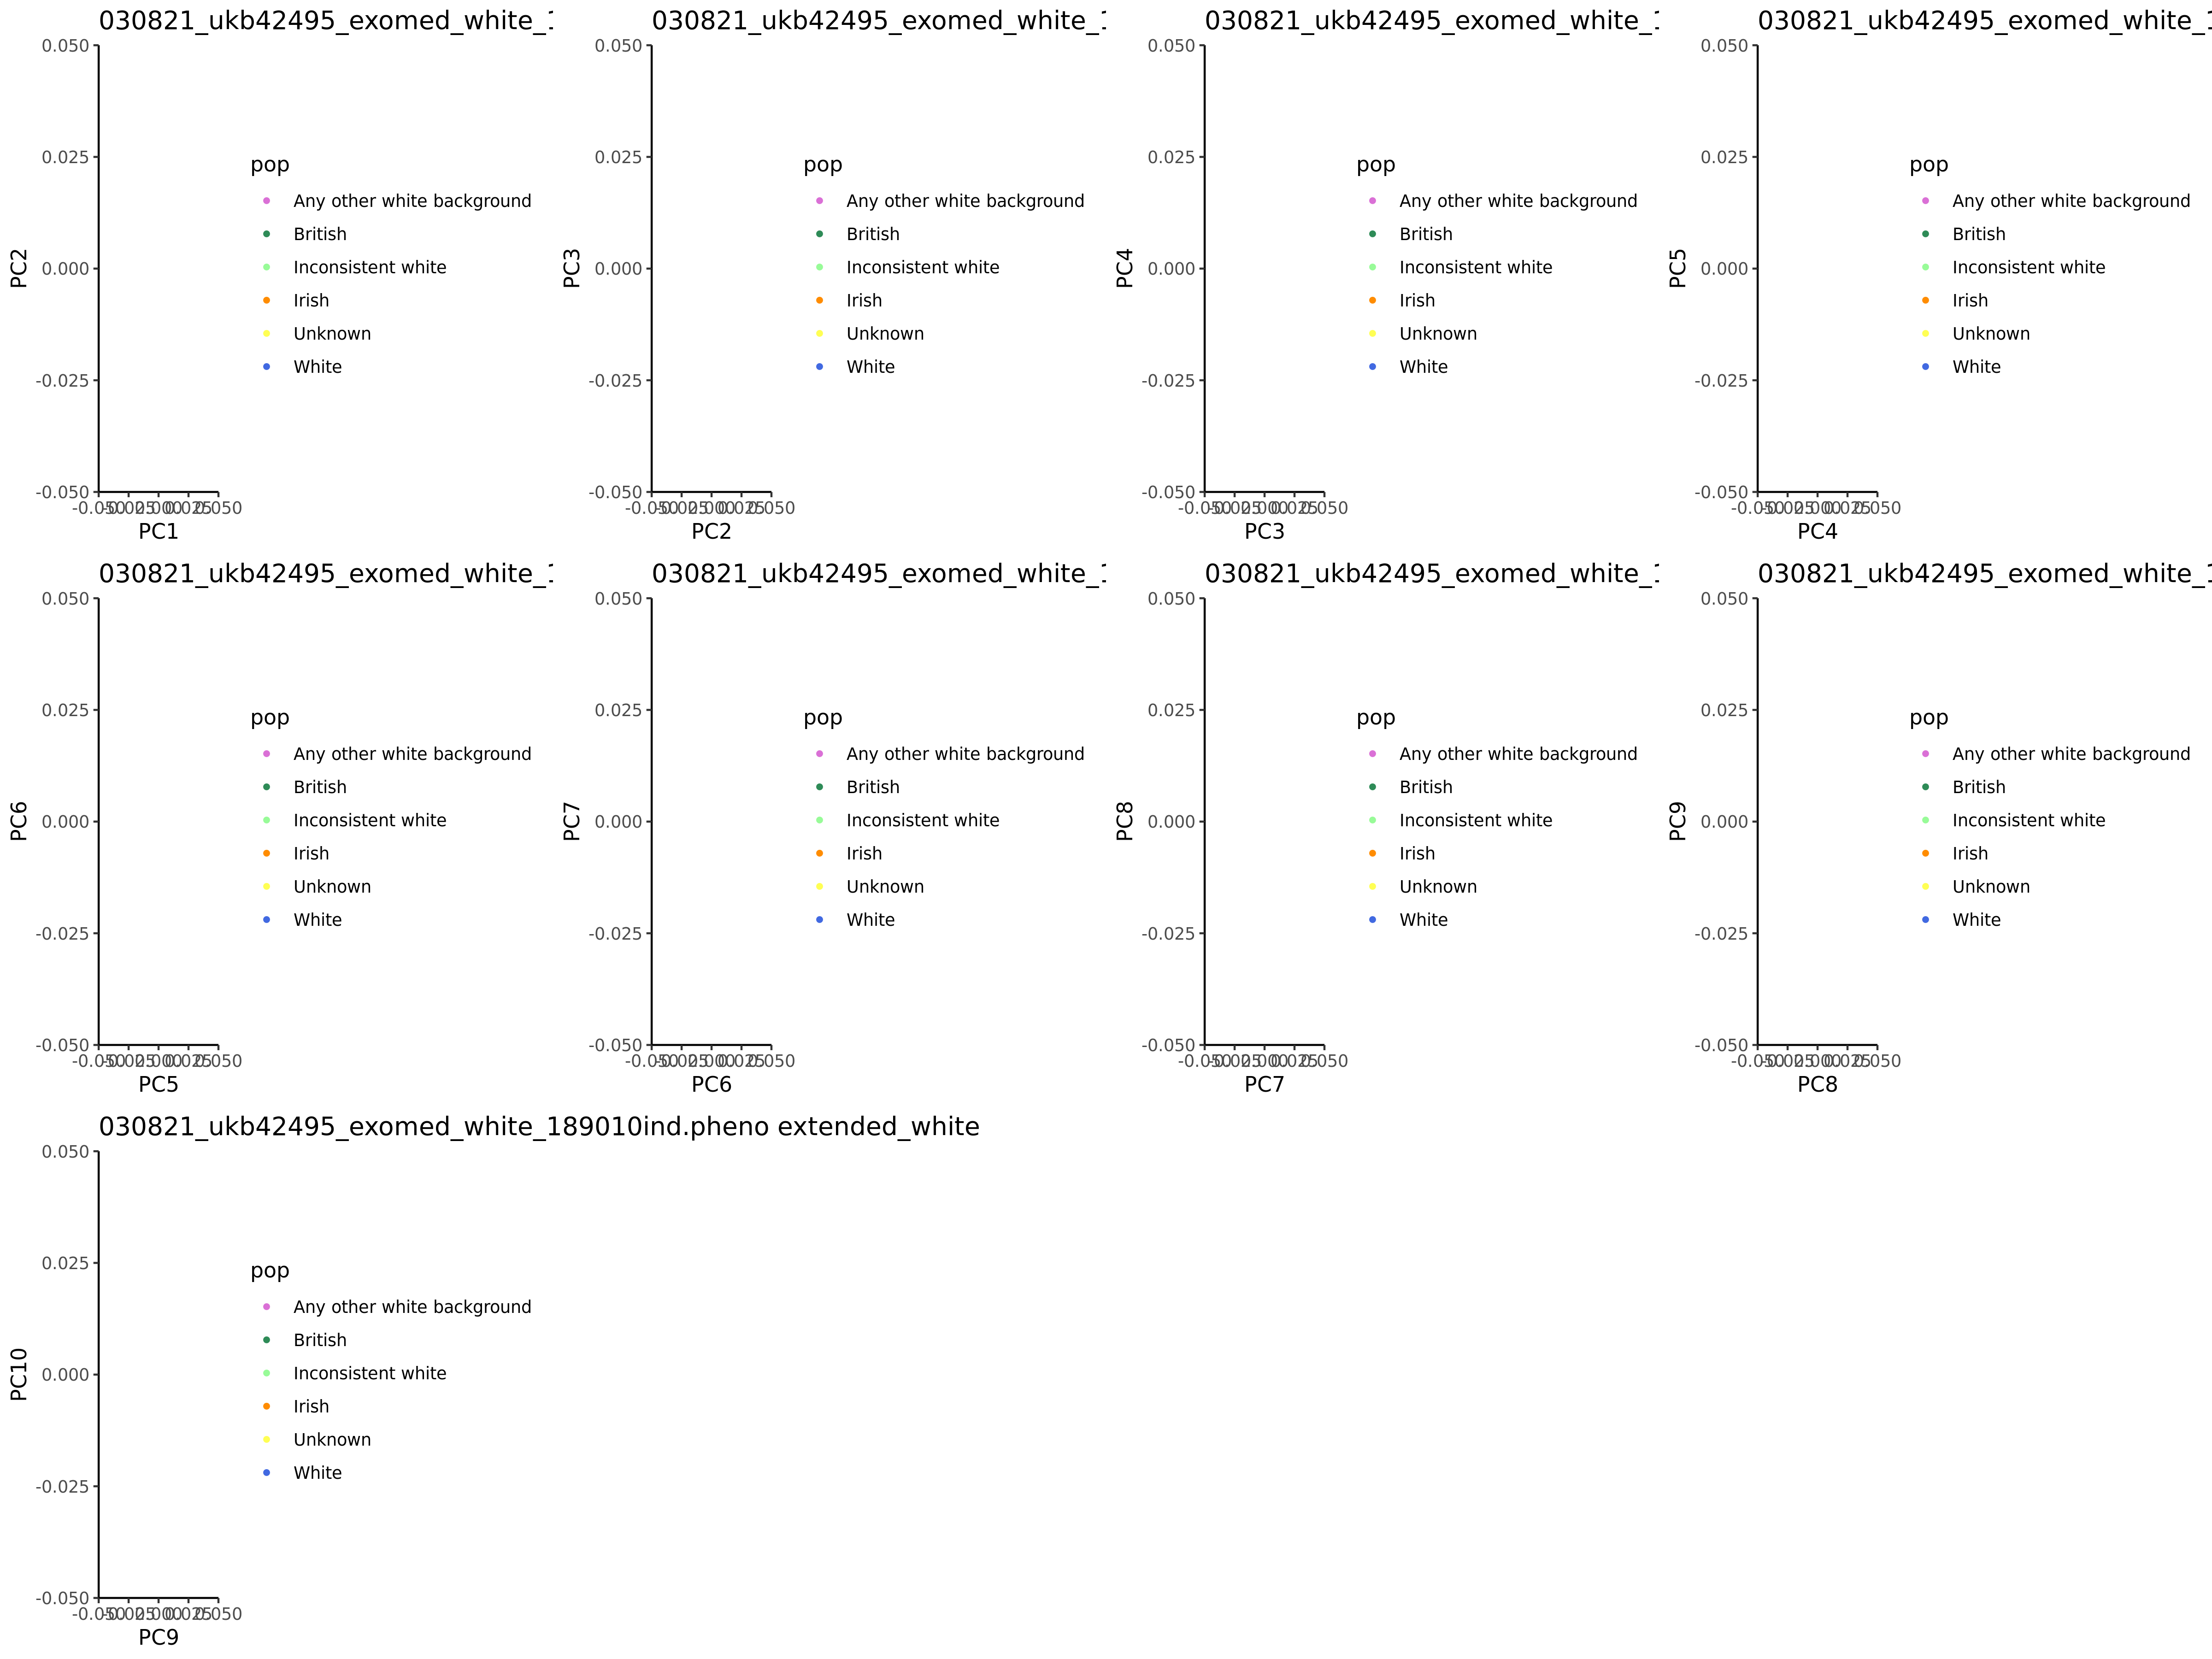

In [41]:
%preview ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png

Trigered the missing-value-deleting-function in ggplot

### Solution 1

In [42]:
if (F) {
    min_axis <- round(colMins(as.matrix(f$projection[sapply(f$projection, is.numeric)])),1)
    max_axis <- round(colMaxs(as.matrix(f$projection[sapply(f$projection, is.numeric)])),1)  
} else {
    min_axis <- 0
    max_axis <- 0
}
print(min_axis)
print(max_axis)

[1] 0
[1] 0


These two conditional statements are not functioning. It seems that they are setted up for the outliers. Anyway, min-aixs=maxaxis=0 can be quite suspicious.

In [44]:
if (FALSE) {
    outliers <- read.table('.', col.names=c("FID", "IID"),stringsAsFactors =F)
    plot_pcs = function(pca_final, x, y, title="") {
        ggplot(pca_final, aes_string(x=x, y=y)) + geom_point(aes(color=pop), size=1) + 
          # add circles for these ouliters:
          geom_point(data=filter(pca_final, IID %in% outliers$IID, FID %in% outliers$FID), shape = 21, size=1.5, color='red', stroke = 0.9) +
          # add outliers dots:
          geom_point(data=filter(pca_final, IID %in% outliers$IID, FID %in% outliers$FID), shape = 16, size=1, aes(color=pop)) + 
          labs(title=title,x=x, y=y) +
          scale_y_continuous(limits=c(min_axis, max_axis)) +
          scale_x_continuous(limits=c(min_axis, max_axis)) +
          scale_color_manual(values=color_list) +
          theme_classic()
    }} else {
    plot_pcs = function(pca_final, x, y, title="") {
      ggplot(pca_final, aes_string(x=x, y=y)) + geom_point(aes(color=pop), size=1) + 
          labs(title=title,x=x, y=y) +
          #scale_y_continuous(limits=c(min_axis, max_axis)) +
          #scale_x_continuous(limits=c(min_axis, max_axis)) +
          scale_color_manual(values=color_list) +
          theme_classic()
    }}
unit = 4
n_col = min(4, k)
n_row = ceiling(k / n_col)
plots = lapply(1:(k-1), function(i) plot_pcs(pca_final, paste0("PC",i), paste0("PC",i+1), dat$meta))
png('~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png', width = unit * n_col, height = unit * n_row, unit='in', res=300)
do.call(gridExtra::grid.arrange, c(plots, list(ncol = n_col, nrow = n_row)))
dev.off()

png 
  2

> /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png (812.2 KiB):

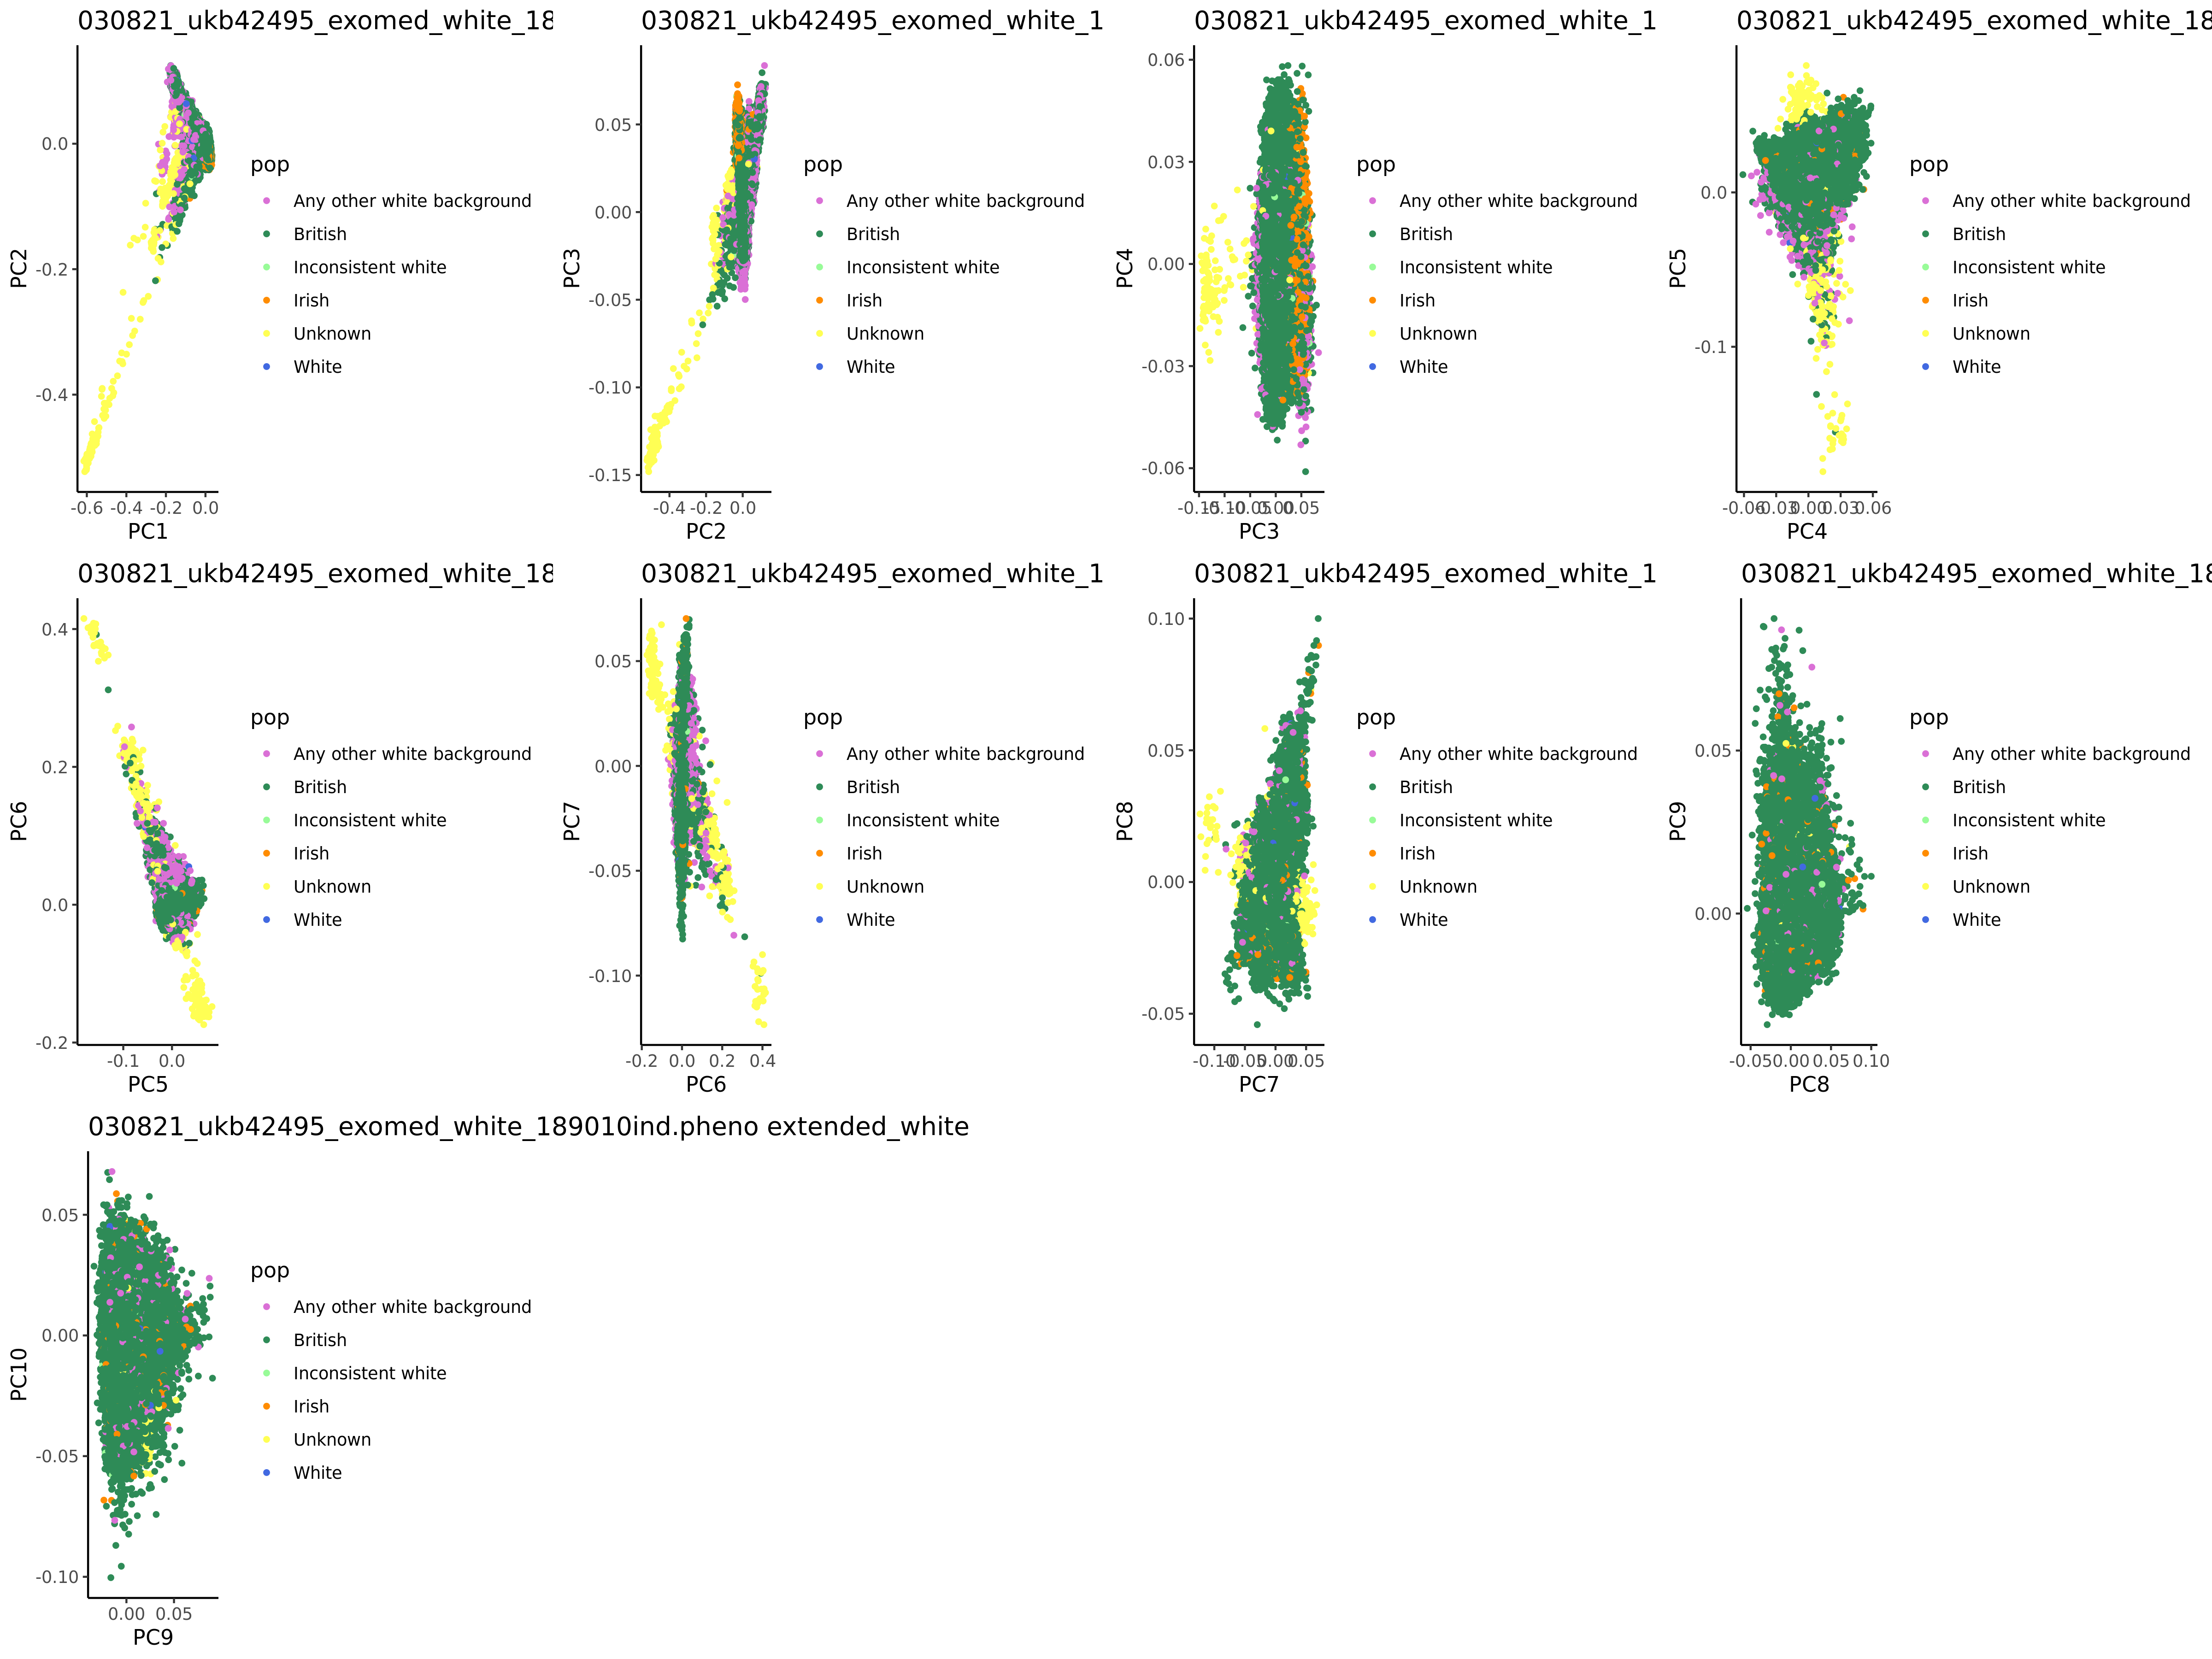

In [45]:
%preview ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png

If we just disable the min_axis and max_axis (in gglpot), the plot can be derived properly.

### Solution 2

In [50]:
if (T) {
    min_axis <- round(colMins(as.matrix(f$projection[sapply(f$projection, is.numeric)])),1)
    max_axis <- round(colMaxs(as.matrix(f$projection[sapply(f$projection, is.numeric)])),1)  
} else {
    min_axis <- 0
    max_axis <- 0
}
print(min_axis)
print(max_axis)
if (FALSE) {
    outliers <- read.table('.', col.names=c("FID", "IID"),stringsAsFactors =F)
    plot_pcs = function(pca_final, x, y, title="") {
        ggplot(pca_final, aes_string(x=x, y=y)) + geom_point(aes(color=pop), size=1) + 
          # add circles for these ouliters:
          geom_point(data=filter(pca_final, IID %in% outliers$IID, FID %in% outliers$FID), shape = 21, size=1.5, color='red', stroke = 0.9) +
          # add outliers dots:
          geom_point(data=filter(pca_final, IID %in% outliers$IID, FID %in% outliers$FID), shape = 16, size=1, aes(color=pop)) + 
          labs(title=title,x=x, y=y) +
          scale_y_continuous(limits=c(min_axis, max_axis)) +
          scale_x_continuous(limits=c(min_axis, max_axis)) +
          scale_color_manual(values=color_list) +
          theme_classic()
    }} else {
    plot_pcs = function(pca_final, x, y, title="") {
      ggplot(pca_final, aes_string(x=x, y=y)) + geom_point(aes(color=pop), size=1) + 
          labs(title=title,x=x, y=y) +
          scale_y_continuous(limits=c(min_axis, max_axis)) +
          scale_x_continuous(limits=c(min_axis, max_axis)) +
          scale_color_manual(values=color_list) +
          theme_classic()
    }}
unit = 4
n_col = min(4, k)
n_row = ceiling(k / n_col)
plots = lapply(1:(k-1), function(i) plot_pcs(pca_final, paste0("PC",i), paste0("PC",i+1), dat$meta))
png('~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png', width = unit * n_col, height = unit * n_row, unit='in', res=300)
do.call(gridExtra::grid.arrange, c(plots, list(ncol = n_col, nrow = n_row)))
dev.off()

[1] -0.6
[1] 0.4


Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


png 
  2

> /home/lg/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png (364.3 KiB):

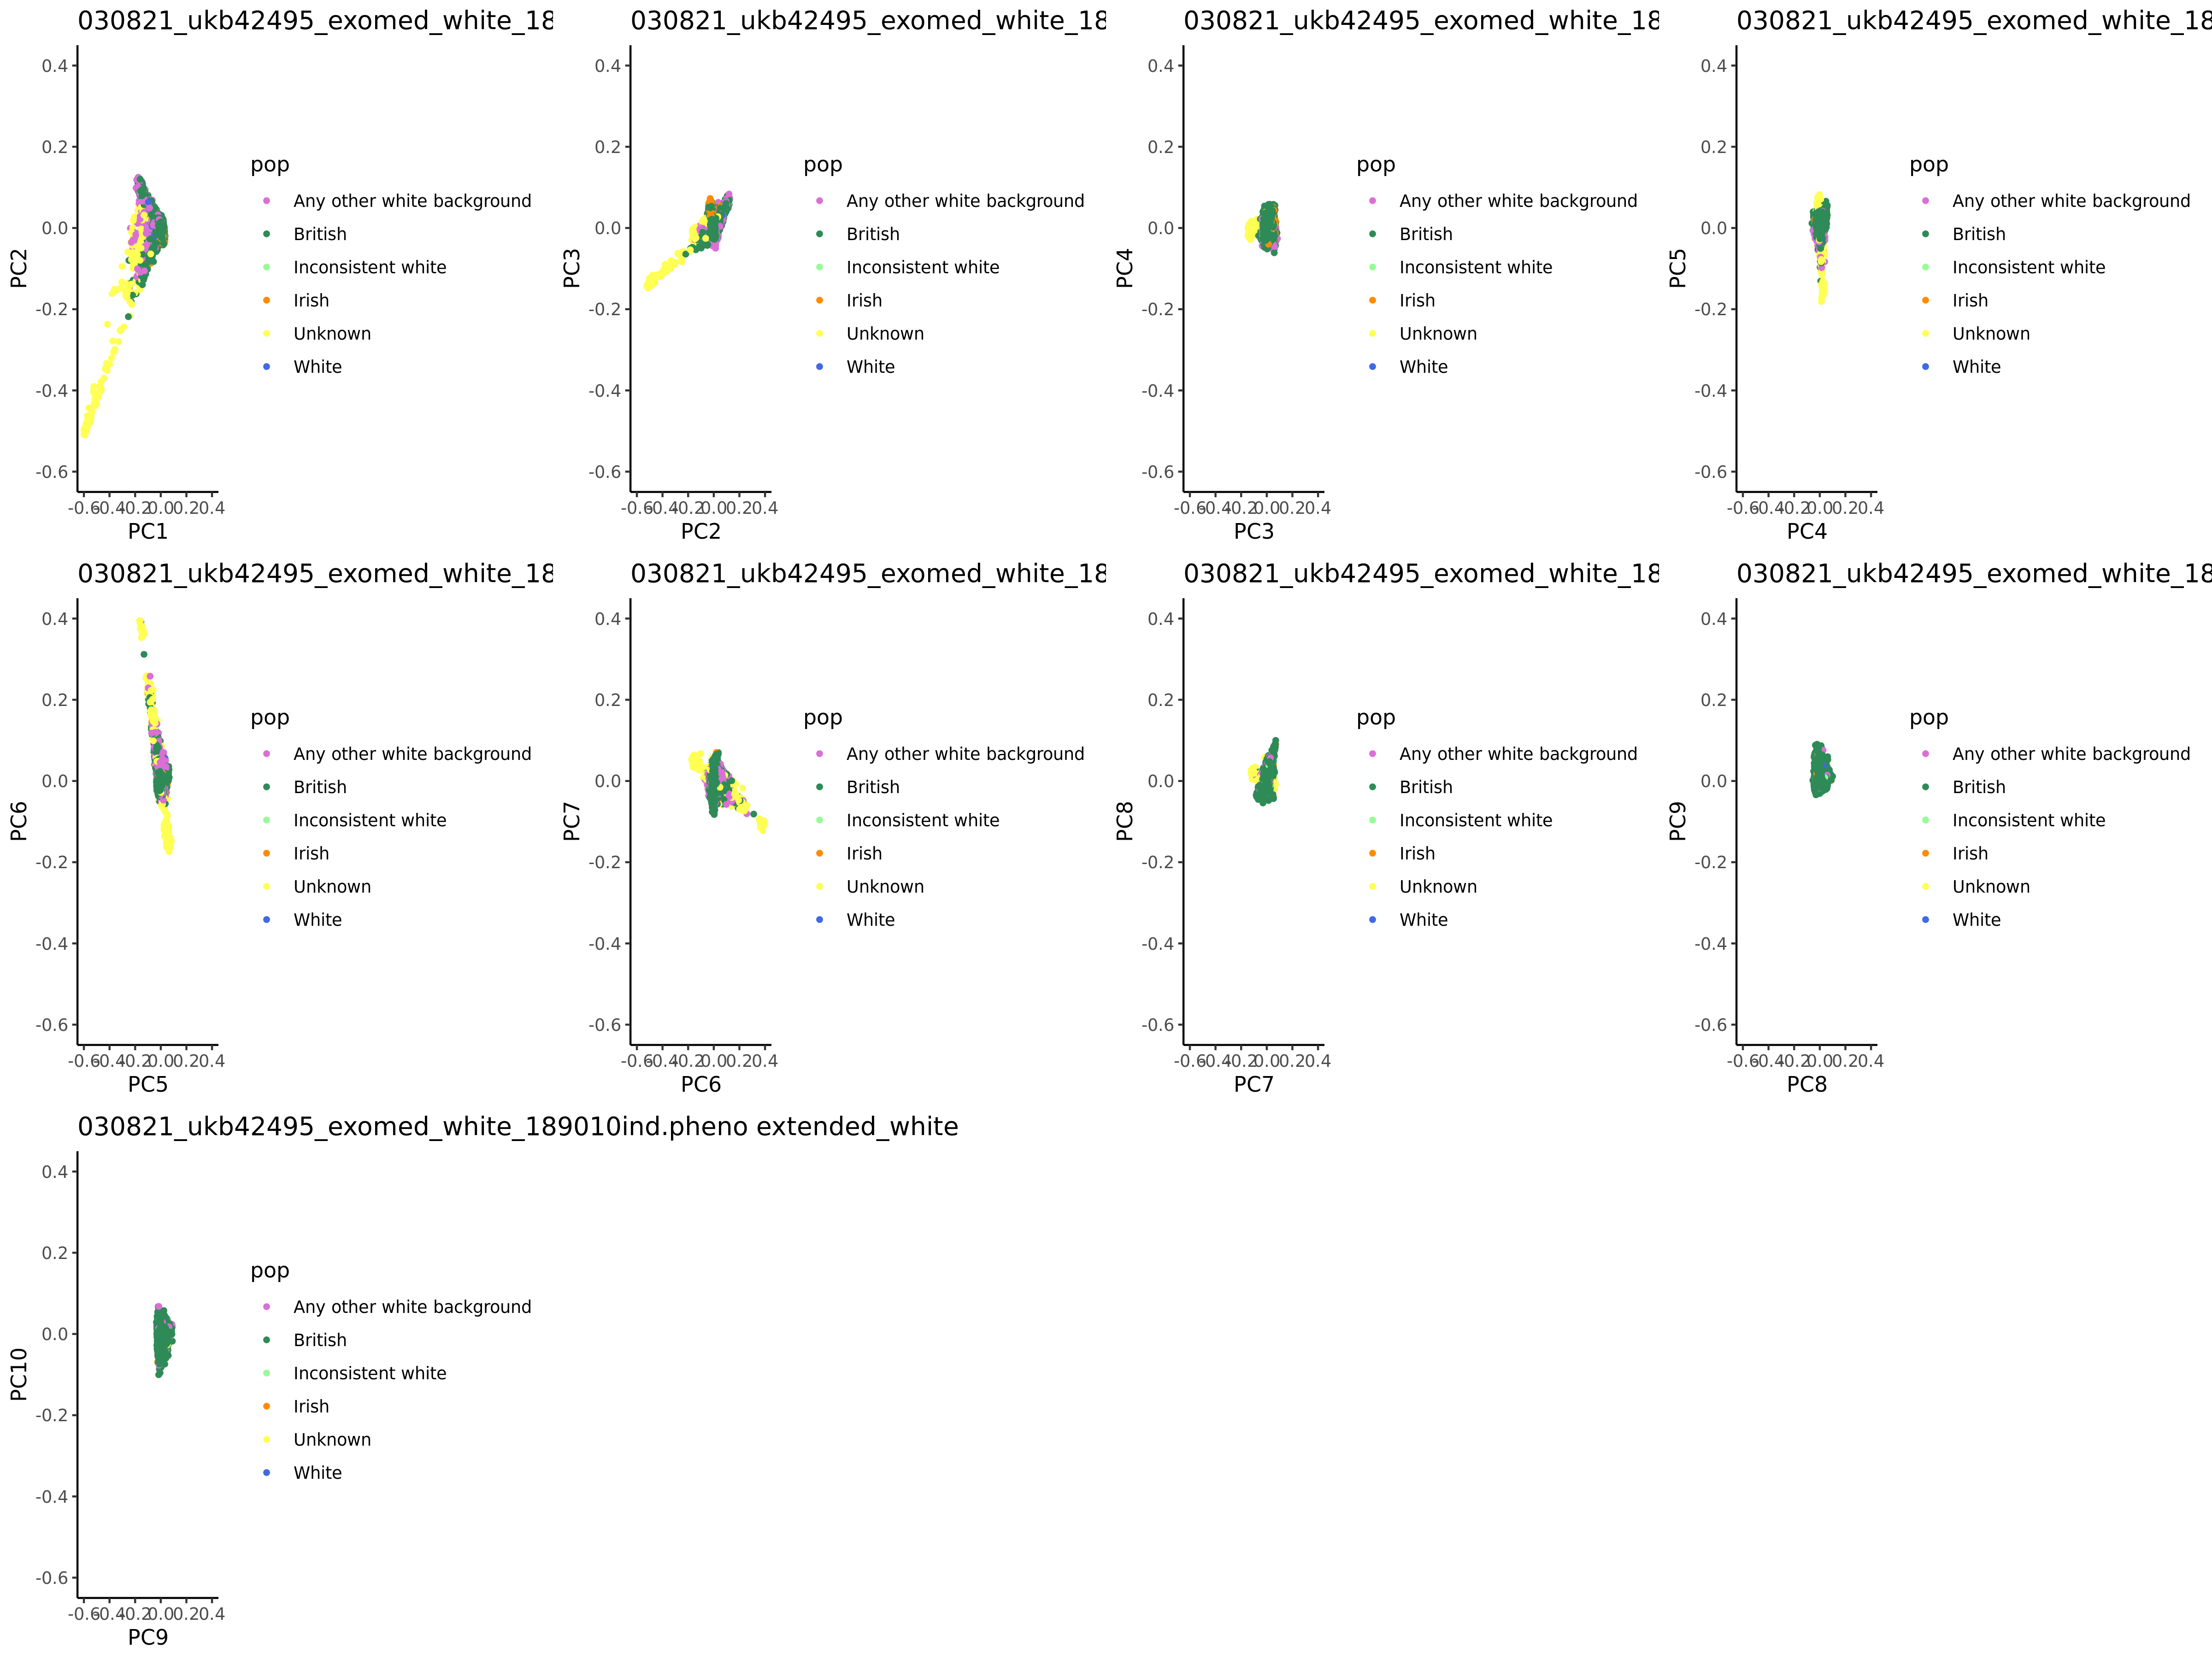

In [51]:
%preview ~/bioworkflows/GWAS/data/white_expanded_06_14_21/output/030821_ukb42495_exomed_white_189010ind.pheno.output.extended_white.pca.pc.png

We can change "False" in contion to "True", like this:

```
if (T) {
    min_axis <- round(colMins(as.matrix(f$projection[sapply(f$projection, is.numeric)])),1)
    max_axis <- round(colMaxs(as.matrix(f$projection[sapply(f$projection, is.numeric)])),1)  
} else {
    min_axis <- 0
    max_axis <- 0
}
```

It seems that it will delete some outlies. But since it determines the min and max values of the axis, the plots are not well displayed given the scales.